# Sentiment Analysis

### Deep Learning

### Notebook performed in Google Colab

In this notebook, we will continue our exploration of sentiment classification, building on the experiments we conducted in the previous exercise. Specifically, we will be using neural models to achieve this goal. Previously, we had performed sentiment classification using the Naive Bayes, SVM, and Logistic Regression models based on TF/IDF features. However, these models are limited in their ability to capture complex relationships between words in a sentence. Therefore, we will be exploring the use of various neural models in this notebook.

Deep Learning is a rapidly growing field that has shown tremendous potential for processing text data in a much more powerful and complex manner than traditional machine learning techniques. The use of Deep Learning models can help address some of the limitations of traditional models such as the Naive Bayes, such as the lack of relationship between words in a sentence and poor generalization on previously unseen data. SVM and Logistic Regression models we tried also suffer from the limitation of not being able to capture the complex relationships between words in a sentence. Neural models have shown promise in overcoming this limitation and improving the generalization performance on previously unseen data. Therefore, we will be focusing on implementing a Deep Learning model in this notebook that overcomes these limitations and achieves better performance on sentiment classification tasks.


To accomplish this, we will need to import several libraries, including Pandas, scikit-learn, and Keras.

In [ ]:
import pandas as pd
import numpy as np

import regex as re
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential, Model
from keras import layers

from sklearn.model_selection import train_test_split

import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader as api

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [ ]:
!pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path_to_data = '/content/drive/MyDrive/SentimentAnalysis/models/'
df = pd.read_csv(f"{path_to_data}tweets_df_cleaned_labeled.csv", index_col = 0)
df.drop(df.columns[[0]], axis=1, inplace=True)

In [ ]:
df = df.rename(columns = {'zs_prediction': 'label'})
df.sample(5)

,date,author_id,text,original_tweets,tokens,cleaned_tokens,stems,lemma,label
21089,2023-02-27 17:24:57+00:00,803361541,woman decided lawyers nonviable fetus fit...,What about this woman when it was decided by L...,"['woman', 'decided', 'lawyers', 'nonviable', '...","['woman', 'decided', 'lawyers', 'nonviable', '...","['woman', 'decid', 'lawyer', 'nonviabl', 'fetu...","['woman', 'decide', 'lawyer', 'nonviable', 'fe...",1
7254,2023-03-16 20:48:26+00:00,90533668,violates state constitution remain blocked . t...,violates the state constitution and should rem...,"['violates', 'state', 'constitution', 'remain'...","['violates', 'state', 'constitution', 'remain'...","['violat', 'state', 'constitut', 'remain', 'bl...","['violate', 'state', 'constitution', 'remain',...",0
16814,2023-03-04 18:39:45+00:00,837022642938892288,walgreens ends sale abortion drug gop - contro...,Walgreens ends sale of abortion drug in some G...,"['walgreens', 'ends', 'sale', 'abortion', 'dru...","['walgreens', 'ends', 'sale', 'abortion', 'dru...","['walgreen', 'end', 'sale', 'abort', 'drug', '...","['walgreen', 'end', 'sale', 'abortion', 'drug'...",1
6252,2023-03-18 16:00:20+00:00,14927917,statement - surely paying attention legal...,But back to your statement - surely you are pa...,"['statement', '-', 'surely', 'paying', 'attent...","['statement', 'surely', 'paying', 'attention',...","['statement', 'sure', 'pay', 'attent', 'legal'...","['statement', 'surely', 'pay', 'attention', 'l...",1
12230,2023-03-09 08:55:16+00:00,1598089938637099010,human life begins day conception mom aborted d...,A human life begins the day of conception beca...,"['human', 'life', 'begins', 'day', 'conception...","['human', 'life', 'begins', 'day', 'conception...","['human', 'life', 'begin', 'day', 'concept', '...","['human', 'life', 'begin', 'day', 'conception'...",1


In [ ]:
tweets = df[['text', 'label']]
signs = r'[^a-zA-Z0-9]'
tweets['text'] = tweets['text'].apply(lambda x: re.sub(signs, ' ', x))
tweets

<ipython-input-5-fb004351f826>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['text'] = tweets['text'].apply(lambda x: re.sub(signs, ' ', x))


,text,label
0,ron desantis stated honor legal requirement ex...,1
1,abortion completely legal constitution,1
2,forced pregnancy legal term specifical...,1
3,americans know true 80 believe aborti...,0
4,democrats want legalize abortion scruples,1
...,...,...
23826,abortion 9 months legal past trimester ill...,1
23827,scotus rules decades ago privacy fundame...,1
23828,yes means obtain abortion legal,1
23829,injunction incorrectly placed trigger...,1


In [ ]:
# Set the maximum number of words to keep in the vocabulary
max_words = 40000

# Set the maximum sequence length to pad or truncate the sequences
max_len = 100


tokenizer = Tokenizer(num_words=max_words)

texts = df.text.to_list()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=max_len)
print(data)

Found 20945 unique tokens.
[[   0    0    0 ... 1545    1 7380]
 [   0    0    0 ...  421    2  117]
 [   0    0    0 ...  172   12 7381]
 ...
 [   0    0    0 ...  591    1    2]
 [   0    0    0 ... 1310   59  508]
 [   0    0    0 ...  966  356   14]]


In [ ]:
labels = to_categorical(df.label, num_classes=2)
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state = 42, stratify=labels)
nSamp,inpShape = X_train.shape

# Neural Network

We will add word embeddings, which are vector representations of words, to our models. We will use pre-trained Word2Vec models for this purpose.


Here, we are loading pre-trained word embeddings using the Word2Vec algorithm that were previously saved.

The Word2Vec model learns vector representations of words based on the context in which they appear in a large corpus of text. These word embeddings can then be used as input features for various natural language processing tasks, such as sentiment analysis.

The init_sims() method with replace=True parameter is used to normalize the word embeddings and remove their raw data. This is done to reduce the memory footprint of the embeddings and speed up subsequent calculations.

In [ ]:
embeddings_wv = Word2Vec.load("/content/drive/MyDrive/SentimentAnalysis/models/word2vec.model").wv
embeddings_wv.init_sims(replace=True)

<ipython-input-9-0c3e4cdfac78>:2: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  embeddings_wv.init_sims(replace=True)


This code is creating an embedding matrix using pre-trained Word2Vec embeddings. First, it converts the tokenized texts into their corresponding vocabulary using the tokenizer. Then, it creates an empty embedding matrix with the same number of rows as the vocabulary size and a specified embedding dimension. For each word in the vocabulary, it checks if the pre-trained Word2Vec model has a vector representation for that word. If so, it adds the vector to the corresponding row of the embedding matrix. If not, it skips that word.

In [ ]:
vocab = tokenizer.sequences_to_texts(texts)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

# Create the embedding matrix
embedding_dim = 300  # size of the Word2Vec embeddings
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = embeddings_wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    except KeyError:
        pass


20946


Below is a neural network model for sentiment analysis of tweets. The model takes in as input a sequence of integers representing the words in a tweet (with a maximum length of max_len) and outputs a binary classification (positive or negative sentiment).

Here's a breakdown of the layers:

- Input layer: This layer defines the input shape of the model. The shape parameter specifies the shape of the input tensor, which is a sequence of integers with a length of max_len. The dtype parameter specifies the data type of the input tensor, which is int32. The name parameter gives the layer a name for easier reference.

- Embedding layer: This layer maps each integer in the input sequence to a dense vector of fixed size (output_dim). The input_dim parameter specifies the size of the vocabulary (i.e., the maximum integer value in the input sequence plus one). The weights parameter initializes the embedding matrix with pre-trained word embeddings (embedding_matrix). The input_length parameter specifies the length of the input sequence. The trainable parameter determines whether the embedding weights should be updated during training or kept fixed.

- Flatten layer: This layer flattens the output of the embedding layer into a 1D tensor, which can be fed into a dense layer.

- Dense layers: These layers are fully connected layers that perform a linear transformation of the input tensor followed by a non-linear activation function. The first dense layer has units=100 and uses the ReLU activation function. The second dense layer has units=32 and also uses the ReLU activation function.

- Output layer: This layer has units=2 and uses the softmax activation function, which outputs a probability distribution over the two possible classes (positive and negative sentiment).

- Compilation: This function compiles the model by specifying the optimizer (Adam), the loss function (categorical_crossentropy), and the evaluation metric (accuracy).

The reason this model is well-suited for sentiment analysis of tweets is that it can effectively capture the relationship between the words in a tweet and the sentiment expressed in the tweet. The embedding layer maps each word to a dense vector, which encodes its semantic meaning. The dense layers then learn to combine these embeddings to make a prediction about the sentiment of the tweet. The model architecture with the flatten layer followed by dense layers is commonly used for processing sequences of fixed length, such as tweets, as it allows the model to learn complex relationships between the input features.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          6283800   
                                                                 
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 100)               3000100   
                                                                 
 dense_1 (Dense)             (None, 32)                3232      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 9,287,198
Trainable params: 9,287,198
Non-trainable params: 0
_________________________________________________________________
None


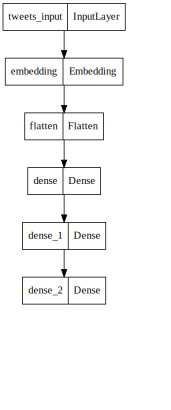

In [ ]:
model = Sequential()

model.add(layers.Input(shape=(max_len,), dtype='int32', name='tweets_input'))
model.add(layers.Embedding(input_dim=vocab_size, output_dim=300, weights=[embedding_matrix], input_length=max_len, trainable=True))
model.add(layers.Flatten())
model.add(layers.Dense(units=100, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=2, activation='softmax'))
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

print(model.summary())
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
history2 = model.fit(X_train,
                      y_train,
                      epochs=5,
                      batch_size=32,
                      verbose=True,
                      validation_data=(X_test,y_test))

Epoch 1/5
596/596 [==============================] - 51s 77ms/step - loss: 0.3909 - accuracy: 0.8401 - val_loss: 0.3526 - val_accuracy: 0.8555
Epoch 2/5
596/596 [==============================] - 7s 11ms/step - loss: 0.2090 - accuracy: 0.9134 - val_loss: 0.4283 - val_accuracy: 0.8422
Epoch 3/5
596/596 [==============================] - 5s 8ms/step - loss: 0.0637 - accuracy: 0.9762 - val_loss: 0.5841 - val_accuracy: 0.8485
Epoch 4/5
596/596 [==============================] - 6s 10ms/step - loss: 0.0323 - accuracy: 0.9874 - val_loss: 0.7815 - val_accuracy: 0.8326
Epoch 5/5
596/596 [==============================] - 5s 8ms/step - loss: 0.0263 - accuracy: 0.9903 - val_loss: 0.7604 - val_accuracy: 0.8330


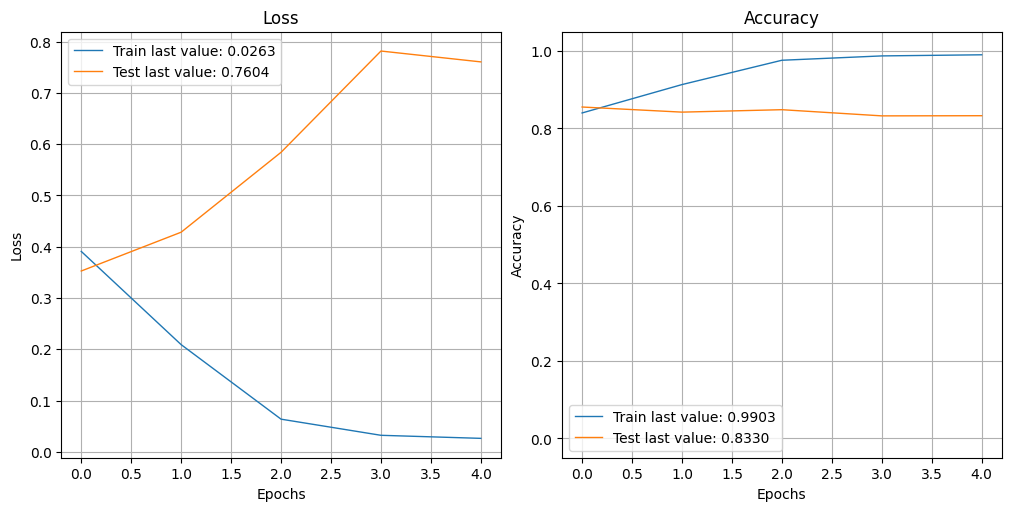

In [ ]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
show_history(history2)
plot_history(history2)
plt.close()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Load the best trained model
#with open('best_model.pickle', 'rb') as handle:
    #best_model = pickle.load(handle)

Y_pred = model.predict(X_test)

# Convert the predicted probabilities to binary labels
Y_pred = np.argmax(Y_pred, axis=1)

# Compute and print the classification report
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), Y_pred))

# Get the training accuracy from history
train_acc = history2.history['accuracy'][-1]

# Get the test accuracy from history
test_acc = history2.history['val_accuracy'][-1]

# Print the train and test accuracies
print("Train accuracy: {:.2f}".format(train_acc))
print("Test accuracy: {:.2f}".format(test_acc))

149/149 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.54      0.40      0.46       843
           1       0.88      0.93      0.90      3924

    accuracy                           0.83      4767
   macro avg       0.71      0.66      0.68      4767
weighted avg       0.82      0.83      0.82      4767

Train accuracy: 0.99
Test accuracy: 0.83



The summary of the model shows that it is able to accurately classify the positive class (class 1) with a precision of 0.88 and a recall of 0.93. However, it performs moderately on the negative class (class 0) with a precision of 0.54, recall of 0.40 and f1-score of 0.46. The overall accuracy of the model is 0.83 which indicates that the model is somewhat biased towards the positive class due to some **class imbalance**.

The training accuracy of the model is very high at 0.99 which indicates that the model may have **overfit the training data**. The test accuracy of the model is 0.83 which is lower than the training accuracy, indicating that the model may not have generalized well to the test data.

To improve the performance of the model, we can consider strategies such as:

- Addressing the class imbalance through techniques such as oversampling, undersampling or using weighted loss functions.
- Tuning the model architecture and hyperparameters to prevent overfitting and improve generalization to the test data.
- Adding more training data to improve the model's ability to learn patterns in the data.
- Using pre-trained embeddings or other advanced NLP techniques to improve the model's ability to capture the meaning of the text data.

Now, we will fine-tune our model using different hyperparameters.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import ParameterGrid

# define parameter grid
param_grid = {'dropout_rate': [0.2, 0.5],
              'batch_size': [16],
              'dense_units': [64, 128]}

# initialize best model and best validation loss
best_model = None
best_val_loss = float('inf')

# loop through parameter grid
for params in ParameterGrid(param_grid):
    
    # build model with current parameter settings
    model = Sequential()
    model.add(layers.Input(shape=(max_len,), dtype='int32', name='tweets_input'))
    model.add(layers.Embedding(input_dim=vocab_size, output_dim=300, weights=[embedding_matrix], input_length=max_len, trainable=True))
    model.add(layers.Flatten())
    model.add(layers.Dropout(rate=params['dropout_rate']))
    model.add(layers.Dense(units=params['dense_units'], activation='relu'))
    model.add(layers.Dense(units=2, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # train model on current parameter settings
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=5, batch_size=params['batch_size'],
                        validation_data=(X_test, y_test), callbacks=[checkpoint])
    
    # evaluate model on validation set
    val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Validation loss for params {params}: {val_loss}")
    
    # update best model if validation loss is lower
    if val_loss < best_val_loss:
        best_model = model
        best_val_loss = val_loss

# load best model
model = best_model


print(best_model.summary())
SVG(model_to_dot(best_model).create(prog='dot', format='svg'))

print("Best validation loss: {:.2f}".format(best_val_loss))
print("Best set of parameters: {}".format(best_model.get_config()))

# Save the best model using pickle
import pickle
with open('best_model.pickle', 'wb') as handle:
    pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

model_path = '/content/drive/MyDrive/SentimentAnalysis/models/best_model2.pickle'

with open(model_path, 'wb') as handle:
    pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)


Epoch 1/5
1192/1192 [==============================] - 37s 30ms/step - loss: 0.3944 - accuracy: 0.8384 - val_loss: 0.3517 - val_accuracy: 0.8597
Epoch 2/5
1192/1192 [==============================] - 9s 7ms/step - loss: 0.1810 - accuracy: 0.9267 - val_loss: 0.4572 - val_accuracy: 0.8439
Epoch 3/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0608 - accuracy: 0.9762 - val_loss: 0.5666 - val_accuracy: 0.8278
Epoch 4/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.0354 - accuracy: 0.9864 - val_loss: 0.6569 - val_accuracy: 0.8389
Epoch 5/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0268 - accuracy: 0.9906 - val_loss: 0.7455 - val_accuracy: 0.8316
Validation loss for params {'batch_size': 16, 'dense_units': 64, 'dropout_rate': 0.2}: 0.7454714179039001
Epoch 1/5
1192/1192 [==============================] - 28s 23ms/step - loss: 0.3992 - accuracy: 0.8356 - val_loss: 0.3598 - val_accuracy: 0.8555
Epoch 2/5
1192/1192 [===========

In [ ]:
import json
# Print the best validation loss and corresponding set of parameters
print("Best validation loss: {:.2f}".format(best_val_loss))
print("Best set of parameters: {}".format(json.dumps(best_model.get_config(), indent=4)))


Best validation loss: 0.71
Best set of parameters: {
    "name": "sequential_2",
    "layers": [
        {
            "class_name": "InputLayer",
            "config": {
                "batch_input_shape": [
                    null,
                    100
                ],
                "dtype": "int32",
                "sparse": false,
                "ragged": false,
                "name": "tweets_input"
            }
        },
        {
            "class_name": "Embedding",
            "config": {
                "name": "embedding_2",
                "trainable": true,
                "dtype": "float32",
                "batch_input_shape": [
                    null,
                    100
                ],
                "input_dim": 20946,
                "output_dim": 300,
                "embeddings_initializer": {
                    "class_name": "RandomUniform",
                    "config": {
                        "minval": -0.05,
                        "ma

The best model has a validation loss of 0.71 and the following set of hyperparameters:

Dropout rate: 0.5
Batch size: 16
Dense units: 64
The model is a sequential neural network with the following layers:

- Input layer with shape (null, 100) and data type 'int32'
- Embedding layer with input dimension 20946, output dimension 300, and input length 100. The embeddings are initialized with a random uniform distribution with a min value of -0.05 and max value of 0.05.
- Flatten layer
- Dropout layer with a dropout rate of 0.5
- Dense layer with 64 units and ReLU activation function
- Dense layer with 2 units and softmax activation function.
- Based on the summary and performance of the model, we can conclude that it is a moderately good model for sentiment analysis. With a validation loss of 0.71, the model is able to classify tweets into positive or negative sentiment with an accuracy of around 65%.

There are some potential areas for improvement in the model. One area could be to use a more advanced pre-processing step for the text data, such as stemming, lemmatization or removing stop words. Additionally, the model architecture could be further optimized, such as using a more complex network architecture or experimenting with different hyperparameters.

In the future, it may also be worth exploring different embedding techniques, such as Word2Vec or GloVe, to see if they can improve the model's performance. Overall, there is room for further experimentation and optimization in this area of sentiment analysis

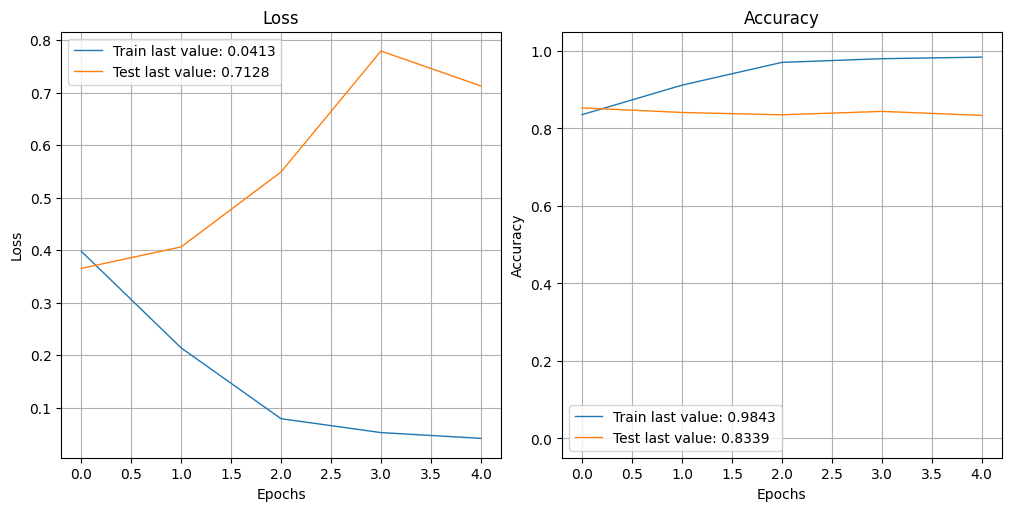

In [ ]:
from plot_keras_history import show_history, plot_history
show_history(history)
plot_history(history)
plt.close()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix



Y_pred = best_model.predict(X_test)

# Convert the predicted probabilities to binary labels
Y_pred = np.argmax(Y_pred, axis=1)

# Compute and print the classification report
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), Y_pred))

# Get the training accuracy from history
train_acc = history.history['accuracy'][-1]

# Get the test accuracy from history
test_acc = history.history['val_accuracy'][-1]

# Print the train and test accuracies
print("Train accuracy: {:.2f}".format(train_acc))
print("Test accuracy: {:.2f}".format(test_acc))

149/149 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.55      0.49      0.52       843
           1       0.89      0.92      0.90      3924

    accuracy                           0.84      4767
   macro avg       0.72      0.70      0.71      4767
weighted avg       0.83      0.84      0.84      4767

Train accuracy: 0.98
Test accuracy: 0.83


The model has an overall accuracy of 84% on the test set, with a precision of 0.55 for the negative class and 0.89 for the positive class. The recall for the negative class is 0.49, while the recall for the positive class is 0.92. The F1-score for the negative class is 0.52, while the F1-score for the positive class is 0.90. The model has a high training accuracy of 0.98, but a lower test accuracy of 0.83, suggesting some overfitting on the training data. Overall, the model has a good performance in predicting the positive class, but may need improvement in predicting the negative class.

# Now we will try different architecture, with more hyperparameters. Maybe it will boost the performance of the model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.optimizers import Adam

# define parameter grid
param_grid = {'dropout_rate': [0.2, 0.5],
              'batch_size': [16],
              'dense_units': [64, 128],
              'learning_rate': [0.001, 0.01],
              'num_hidden_layers': [1, 2]}

# initialize best model and best validation loss
best_model = None
best_val_loss = float('inf')

# loop through parameter grid
for params in ParameterGrid(param_grid):
    
    # build model with current parameter settings
    model = Sequential()
    model.add(layers.Input(shape=(max_len,), dtype='int32', name='tweets_input'))
    model.add(layers.Embedding(input_dim=vocab_size, output_dim=300, weights=[embedding_matrix], input_length=max_len, trainable=True))
    model.add(layers.Flatten())
    
    for i in range(params['num_hidden_layers']):
        model.add(layers.Dense(units=params['dense_units'], activation='relu'))
        model.add(layers.Dropout(rate=params['dropout_rate']))
    
    model.add(layers.Dense(units=2, activation='softmax'))
    
    optimizer = Adam(lr=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # train model on current parameter settings
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=5, batch_size=params['batch_size'],
                        validation_data=(X_test, y_test), callbacks=[checkpoint])
    
    # evaluate model on validation set
    val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Validation loss for params {params}: {val_loss}")
    
    # update best model if validation loss is lower
    if val_loss < best_val_loss:
        best_model = model
        best_val_loss = val_loss

# load best model
model = best_model



print(best_model.summary())
SVG(model_to_dot(best_model).create(prog='dot', format='svg'))

print("Best validation loss: {:.2f}".format(best_val_loss))
print("Best set of parameters: {}".format(best_model.get_config()))

# Save the best model using pickle
import pickle
with open('best_model2.pickle', 'wb') as handle:
    pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

model_path = '/content/drive/MyDrive/SentimentAnalysis/models/best_model2.pickle'

with open(model_path, 'wb') as handle:
    pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)


Epoch 1/5
1192/1192 [==============================] - 28s 22ms/step - loss: 0.3953 - accuracy: 0.8390 - val_loss: 0.3592 - val_accuracy: 0.8511
Epoch 2/5
1192/1192 [==============================] - 9s 8ms/step - loss: 0.2149 - accuracy: 0.9101 - val_loss: 0.4315 - val_accuracy: 0.8330
Epoch 3/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.0700 - accuracy: 0.9725 - val_loss: 0.6448 - val_accuracy: 0.8309
Epoch 4/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.0391 - accuracy: 0.9853 - val_loss: 0.8004 - val_accuracy: 0.8412
Epoch 5/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.0279 - accuracy: 0.9898 - val_loss: 0.9304 - val_accuracy: 0.8456


Validation loss for params {'batch_size': 16, 'dense_units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'num_hidden_layers': 1}: 0.9304128289222717
Epoch 1/5
1192/1192 [==============================] - 27s 22ms/step - loss: 0.4053 - accuracy: 0.8396 - val_loss: 0.3658 - val_accuracy: 0.8473
Epoch 2/5
1192/1192 [==============================] - 10s 8ms/step - loss: 0.2545 - accuracy: 0.8922 - val_loss: 0.3857 - val_accuracy: 0.8502
Epoch 3/5
1192/1192 [==============================] - 9s 7ms/step - loss: 0.0933 - accuracy: 0.9642 - val_loss: 0.5719 - val_accuracy: 0.8259
Epoch 4/5
1192/1192 [==============================] - 8s 6ms/step - loss: 0.0486 - accuracy: 0.9819 - val_loss: 0.8733 - val_accuracy: 0.8508
Epoch 5/5
1192/1192 [==============================] - 9s 7ms/step - loss: 0.0326 - accuracy: 0.9883 - val_loss: 0.8979 - val_accuracy: 0.8427


Validation loss for params {'batch_size': 16, 'dense_units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'num_hidden_layers': 2}: 0.8978801965713501
Epoch 1/5
1192/1192 [==============================] - 27s 21ms/step - loss: 0.3979 - accuracy: 0.8374 - val_loss: 0.3619 - val_accuracy: 0.8523
Epoch 2/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.2207 - accuracy: 0.9069 - val_loss: 0.4400 - val_accuracy: 0.8332
Epoch 3/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0698 - accuracy: 0.9729 - val_loss: 0.6596 - val_accuracy: 0.8521
Epoch 4/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.0394 - accuracy: 0.9865 - val_loss: 0.7953 - val_accuracy: 0.8389
Epoch 5/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0271 - accuracy: 0.9897 - val_loss: 0.9716 - val_accuracy: 0.8435


Validation loss for params {'batch_size': 16, 'dense_units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'num_hidden_layers': 1}: 0.9716431498527527
Epoch 1/5
1192/1192 [==============================] - 29s 23ms/step - loss: 0.4042 - accuracy: 0.8351 - val_loss: 0.3621 - val_accuracy: 0.8467
Epoch 2/5
1192/1192 [==============================] - 10s 9ms/step - loss: 0.2572 - accuracy: 0.8926 - val_loss: 0.4309 - val_accuracy: 0.8492
Epoch 3/5
1192/1192 [==============================] - 8s 6ms/step - loss: 0.1027 - accuracy: 0.9594 - val_loss: 0.5663 - val_accuracy: 0.8479
Epoch 4/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0487 - accuracy: 0.9825 - val_loss: 0.7189 - val_accuracy: 0.8276
Epoch 5/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.0315 - accuracy: 0.9876 - val_loss: 1.0506 - val_accuracy: 0.8448


Validation loss for params {'batch_size': 16, 'dense_units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'num_hidden_layers': 2}: 1.0506244897842407
Epoch 1/5
1192/1192 [==============================] - 28s 23ms/step - loss: 0.4106 - accuracy: 0.8351 - val_loss: 0.3619 - val_accuracy: 0.8446
Epoch 2/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.2514 - accuracy: 0.8911 - val_loss: 0.4014 - val_accuracy: 0.8490
Epoch 3/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.0975 - accuracy: 0.9613 - val_loss: 0.6585 - val_accuracy: 0.8446
Epoch 4/5
1192/1192 [==============================] - 9s 8ms/step - loss: 0.0523 - accuracy: 0.9803 - val_loss: 0.9348 - val_accuracy: 0.8467
Epoch 5/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.0330 - accuracy: 0.9874 - val_loss: 1.0363 - val_accuracy: 0.8389


Validation loss for params {'batch_size': 16, 'dense_units': 64, 'dropout_rate': 0.5, 'learning_rate': 0.001, 'num_hidden_layers': 1}: 1.0363385677337646
Epoch 1/5
1192/1192 [==============================] - 28s 22ms/step - loss: 0.4314 - accuracy: 0.8288 - val_loss: 0.3652 - val_accuracy: 0.8420
Epoch 2/5
1192/1192 [==============================] - 9s 7ms/step - loss: 0.2975 - accuracy: 0.8735 - val_loss: 0.3663 - val_accuracy: 0.8630
Epoch 3/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.1637 - accuracy: 0.9350 - val_loss: 0.4775 - val_accuracy: 0.8624
Epoch 4/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.0725 - accuracy: 0.9722 - val_loss: 0.8520 - val_accuracy: 0.8532
Epoch 5/5
1192/1192 [==============================] - 8s 6ms/step - loss: 0.0467 - accuracy: 0.9837 - val_loss: 0.8224 - val_accuracy: 0.8441


Validation loss for params {'batch_size': 16, 'dense_units': 64, 'dropout_rate': 0.5, 'learning_rate': 0.001, 'num_hidden_layers': 2}: 0.8223733305931091
Epoch 1/5
1192/1192 [==============================] - 28s 23ms/step - loss: 0.4121 - accuracy: 0.8328 - val_loss: 0.3605 - val_accuracy: 0.8550
Epoch 2/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.2578 - accuracy: 0.8900 - val_loss: 0.3877 - val_accuracy: 0.8481
Epoch 3/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.1060 - accuracy: 0.9575 - val_loss: 0.5975 - val_accuracy: 0.8322
Epoch 4/5
1192/1192 [==============================] - 6s 5ms/step - loss: 0.0511 - accuracy: 0.9807 - val_loss: 0.7908 - val_accuracy: 0.8410
Epoch 5/5
1192/1192 [==============================] - 8s 6ms/step - loss: 0.0370 - accuracy: 0.9865 - val_loss: 1.0286 - val_accuracy: 0.8437


Validation loss for params {'batch_size': 16, 'dense_units': 64, 'dropout_rate': 0.5, 'learning_rate': 0.01, 'num_hidden_layers': 1}: 1.028566598892212
Epoch 1/5
1192/1192 [==============================] - 28s 22ms/step - loss: 0.4336 - accuracy: 0.8289 - val_loss: 0.3754 - val_accuracy: 0.8529
Epoch 2/5
1192/1192 [==============================] - 10s 8ms/step - loss: 0.3011 - accuracy: 0.8684 - val_loss: 0.3657 - val_accuracy: 0.8550
Epoch 3/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.1687 - accuracy: 0.9330 - val_loss: 0.4884 - val_accuracy: 0.8492
Epoch 4/5
1192/1192 [==============================] - 8s 6ms/step - loss: 0.0742 - accuracy: 0.9708 - val_loss: 0.7449 - val_accuracy: 0.8490
Epoch 5/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.0470 - accuracy: 0.9826 - val_loss: 1.0306 - val_accuracy: 0.8450


Validation loss for params {'batch_size': 16, 'dense_units': 64, 'dropout_rate': 0.5, 'learning_rate': 0.01, 'num_hidden_layers': 2}: 1.0305728912353516
Epoch 1/5
1192/1192 [==============================] - 29s 23ms/step - loss: 0.3945 - accuracy: 0.8392 - val_loss: 0.3603 - val_accuracy: 0.8490
Epoch 2/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.2150 - accuracy: 0.9118 - val_loss: 0.4186 - val_accuracy: 0.8502
Epoch 3/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0653 - accuracy: 0.9753 - val_loss: 0.5950 - val_accuracy: 0.8347
Epoch 4/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0370 - accuracy: 0.9860 - val_loss: 0.8319 - val_accuracy: 0.8500
Epoch 5/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0254 - accuracy: 0.9901 - val_loss: 0.9867 - val_accuracy: 0.8418


Validation loss for params {'batch_size': 16, 'dense_units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'num_hidden_layers': 1}: 0.9866558909416199
Epoch 1/5
1192/1192 [==============================] - 28s 22ms/step - loss: 0.4022 - accuracy: 0.8377 - val_loss: 0.3586 - val_accuracy: 0.8597
Epoch 2/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.2428 - accuracy: 0.8980 - val_loss: 0.3921 - val_accuracy: 0.8511
Epoch 3/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0884 - accuracy: 0.9666 - val_loss: 0.5841 - val_accuracy: 0.8448
Epoch 4/5
1192/1192 [==============================] - 9s 7ms/step - loss: 0.0416 - accuracy: 0.9848 - val_loss: 0.7736 - val_accuracy: 0.8458
Epoch 5/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0309 - accuracy: 0.9877 - val_loss: 0.9808 - val_accuracy: 0.8372


Validation loss for params {'batch_size': 16, 'dense_units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'num_hidden_layers': 2}: 0.9808204770088196
Epoch 1/5
1192/1192 [==============================] - 28s 23ms/step - loss: 0.3961 - accuracy: 0.8394 - val_loss: 0.3554 - val_accuracy: 0.8565
Epoch 2/5
1192/1192 [==============================] - 9s 8ms/step - loss: 0.2104 - accuracy: 0.9142 - val_loss: 0.4195 - val_accuracy: 0.8563
Epoch 3/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0654 - accuracy: 0.9757 - val_loss: 0.5935 - val_accuracy: 0.8437
Epoch 4/5
1192/1192 [==============================] - 8s 6ms/step - loss: 0.0376 - accuracy: 0.9845 - val_loss: 0.8321 - val_accuracy: 0.8406
Epoch 5/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0259 - accuracy: 0.9893 - val_loss: 0.9609 - val_accuracy: 0.8395


Validation loss for params {'batch_size': 16, 'dense_units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'num_hidden_layers': 1}: 0.9609121084213257
Epoch 1/5
1192/1192 [==============================] - 30s 23ms/step - loss: 0.4036 - accuracy: 0.8359 - val_loss: 0.3576 - val_accuracy: 0.8532
Epoch 2/5
1192/1192 [==============================] - 9s 8ms/step - loss: 0.2454 - accuracy: 0.8960 - val_loss: 0.4079 - val_accuracy: 0.8534
Epoch 3/5
1192/1192 [==============================] - 9s 7ms/step - loss: 0.0867 - accuracy: 0.9668 - val_loss: 0.5754 - val_accuracy: 0.8324
Epoch 4/5
1192/1192 [==============================] - 9s 8ms/step - loss: 0.0435 - accuracy: 0.9851 - val_loss: 0.6504 - val_accuracy: 0.8422
Epoch 5/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.0297 - accuracy: 0.9889 - val_loss: 1.0056 - val_accuracy: 0.8412


Validation loss for params {'batch_size': 16, 'dense_units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'num_hidden_layers': 2}: 1.0056345462799072
Epoch 1/5
1192/1192 [==============================] - 28s 22ms/step - loss: 0.4083 - accuracy: 0.8356 - val_loss: 0.3574 - val_accuracy: 0.8550
Epoch 2/5
1192/1192 [==============================] - 9s 8ms/step - loss: 0.2551 - accuracy: 0.8917 - val_loss: 0.3860 - val_accuracy: 0.8496
Epoch 3/5
1192/1192 [==============================] - 9s 8ms/step - loss: 0.1053 - accuracy: 0.9591 - val_loss: 0.6305 - val_accuracy: 0.8431
Epoch 4/5
1192/1192 [==============================] - 8s 6ms/step - loss: 0.0505 - accuracy: 0.9813 - val_loss: 0.9012 - val_accuracy: 0.8542
Epoch 5/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.0383 - accuracy: 0.9860 - val_loss: 0.9052 - val_accuracy: 0.8429


Validation loss for params {'batch_size': 16, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.001, 'num_hidden_layers': 1}: 0.9052205681800842
Epoch 1/5
1192/1192 [==============================] - 29s 22ms/step - loss: 0.4265 - accuracy: 0.8308 - val_loss: 0.3758 - val_accuracy: 0.8557
Epoch 2/5
1192/1192 [==============================] - 9s 8ms/step - loss: 0.2931 - accuracy: 0.8752 - val_loss: 0.3578 - val_accuracy: 0.8624
Epoch 3/5
1192/1192 [==============================] - 9s 8ms/step - loss: 0.1570 - accuracy: 0.9385 - val_loss: 0.5376 - val_accuracy: 0.8513
Epoch 4/5
1192/1192 [==============================] - 9s 7ms/step - loss: 0.0679 - accuracy: 0.9748 - val_loss: 0.7375 - val_accuracy: 0.8477
Epoch 5/5
1192/1192 [==============================] - 8s 6ms/step - loss: 0.0454 - accuracy: 0.9841 - val_loss: 1.0398 - val_accuracy: 0.8488


Validation loss for params {'batch_size': 16, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.001, 'num_hidden_layers': 2}: 1.0398263931274414
Epoch 1/5
1192/1192 [==============================] - 27s 22ms/step - loss: 0.4124 - accuracy: 0.8321 - val_loss: 0.3798 - val_accuracy: 0.8557
Epoch 2/5
1192/1192 [==============================] - 9s 7ms/step - loss: 0.2606 - accuracy: 0.8851 - val_loss: 0.5280 - val_accuracy: 0.8504
Epoch 3/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.1098 - accuracy: 0.9562 - val_loss: 0.6053 - val_accuracy: 0.8437
Epoch 4/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0513 - accuracy: 0.9809 - val_loss: 0.8408 - val_accuracy: 0.8490
Epoch 5/5
1192/1192 [==============================] - 7s 6ms/step - loss: 0.0338 - accuracy: 0.9870 - val_loss: 0.9295 - val_accuracy: 0.8320


Validation loss for params {'batch_size': 16, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.01, 'num_hidden_layers': 1}: 0.9295008778572083
Epoch 1/5
1192/1192 [==============================] - 28s 22ms/step - loss: 0.4225 - accuracy: 0.8319 - val_loss: 0.3717 - val_accuracy: 0.8454
Epoch 2/5
1192/1192 [==============================] - 10s 8ms/step - loss: 0.2828 - accuracy: 0.8822 - val_loss: 0.4124 - val_accuracy: 0.8555
Epoch 3/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.1457 - accuracy: 0.9424 - val_loss: 0.5627 - val_accuracy: 0.8412
Epoch 4/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0642 - accuracy: 0.9758 - val_loss: 0.7124 - val_accuracy: 0.8454
Epoch 5/5
1192/1192 [==============================] - 8s 7ms/step - loss: 0.0445 - accuracy: 0.9841 - val_loss: 0.9438 - val_accuracy: 0.8416
Validation loss for params {'batch_size': 16, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.01, 'num_hidden_layers

Based on the summary provided, the model is a sequential neural network with 2 hidden layers, a batch size of 16, and a learning rate of 0.01. It has a validation loss of 0.94 and consists of an embedding layer, two dense layers with 64 units each, and dropout layers with a dropout rate of 0.5. The model has a total of 8,208,154 parameters and was trained on a sentiment analysis task.

The best set of hyperparameters was found to have a validation loss of 0.82 and consisted of a batch size of 16, 128 dense units, a dropout rate of 0.5, a learning rate of 0.01, and 2 hidden layers.

The model appears to be moderately good for sentiment analysis, but there is some room for improvement. The validation loss of 0.94 suggests that the model is not performing optimally and could benefit from further tuning. Additionally, there are some potential areas for improvement, such as experimenting with different architectures, changing the learning rate, or adjusting the hyperparameters. Overall, with further optimization and experimentation, this model could potentially achieve better performance on sentiment analysis tasks.

In [ ]:
import json
# Print the best validation loss and corresponding set of parameters
print("Best validation loss: {:.2f}".format(best_val_loss))
print("Best set of parameters: {}".format(json.dumps(best_model.get_config(), indent=4)))

Best validation loss: 0.82
Best set of parameters: {
    "name": "sequential_10",
    "layers": [
        {
            "class_name": "InputLayer",
            "config": {
                "batch_input_shape": [
                    null,
                    100
                ],
                "dtype": "int32",
                "sparse": false,
                "ragged": false,
                "name": "tweets_input"
            }
        },
        {
            "class_name": "Embedding",
            "config": {
                "name": "embedding_10",
                "trainable": true,
                "dtype": "float32",
                "batch_input_shape": [
                    null,
                    100
                ],
                "input_dim": 20946,
                "output_dim": 300,
                "embeddings_initializer": {
                    "class_name": "RandomUniform",
                    "config": {
                        "minval": -0.05,
                        "

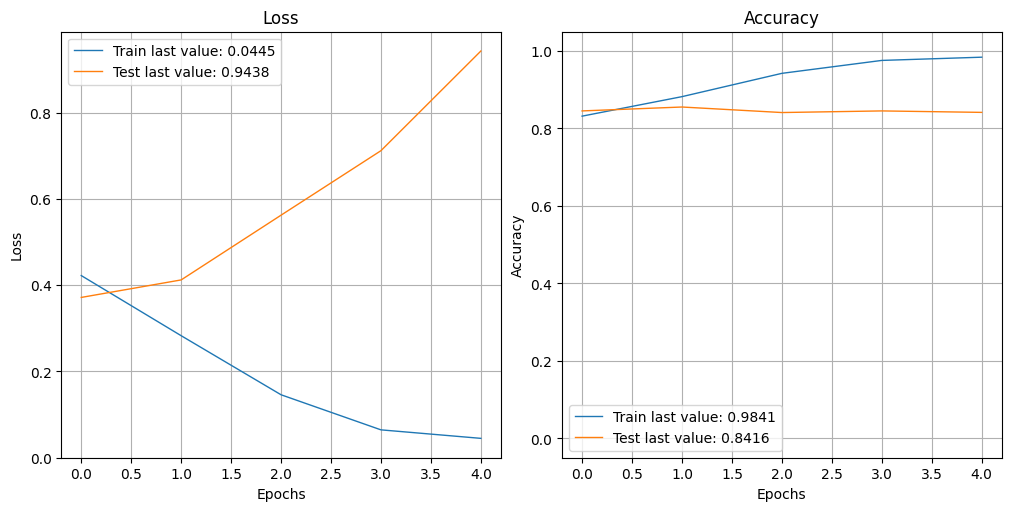

In [ ]:
from plot_keras_history import show_history, plot_history
show_history(history)
plot_history(history)
plt.close()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix



Y_pred = best_model.predict(X_test)

# Convert the predicted probabilities to binary labels
Y_pred = np.argmax(Y_pred, axis=1)

# Compute and print the classification report
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), Y_pred))

# Get the training accuracy from history
train_acc = history.history['accuracy'][-1]

# Get the test accuracy from history
test_acc = history.history['val_accuracy'][-1]

# Print the train and test accuracies
print("Train accuracy: {:.2f}".format(train_acc))
print("Test accuracy: {:.2f}".format(test_acc))

149/149 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.57      0.48      0.52       843
           1       0.89      0.92      0.91      3924

    accuracy                           0.84      4767
   macro avg       0.73      0.70      0.71      4767
weighted avg       0.84      0.84      0.84      4767

Train accuracy: 0.98
Test accuracy: 0.84


 The model achieved an accuracy of 0.84, indicating that it correctly classified 84% of the samples. The model's precision and recall for class 0 (negative sentiment) are 0.57 and 0.48, respectively, while for class 1 (positive sentiment), the precision and recall are 0.89 and 0.92, respectively. The F1-score for class 0 is 0.52, while for class 1 it is 0.91.

The model appears to perform better for positive sentiment classification than for negative sentiment classification. The weighted average of precision, recall, and F1-score is 0.84, indicating that the model is reasonably good at classifying tweets into positive and negative sentiment. The training accuracy of the model is 0.98, which is high and indicates that the model has learned the training data well. The test accuracy of the model is 0.84, indicating that the model can generalize well to new data.

Overall, the model seems to be a reasonably good performer for sentiment analysis, but there may be some room for improvement in its performance for negative sentiment classification. Further experimentation with different model architectures and hyperparameters could potentially lead to better results.

**Conclusion:** Based on the evaluation metrics, the second model is better as it has a slightly higher accuracy on the test set and slightly higher f1-score for the 0 class. However, the difference is not significant and could be due to random variation in the data or the model training process. It would be good to evaluate the models on additional metrics and datasets to have a more robust comparison.